In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import glob
import numpy as np
import random

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhuochaozhong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
STOPWORDS = set(stopwords.words('english'))

In [2]:
bbc_dir = 'bbc-2/'
categories = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

news_text = []

for label, idx in categories.items():    
    for file_name in glob.glob(bbc_dir + label + '/*.txt'):
        with open(file_name, 'r', encoding='utf8', errors='ignore') as news_file:
            text = news_file.read()
            
#             text_tokenized = word_tokenize(text)
#             text_wo_stopword = [word for word in text_tokenized if not word in STOPWORDS]
            
#             text = ' '.join(text_wo_stopword)
            
        news_text.append([text, idx])
        
random.shuffle(news_text)

In [3]:
text = [text[0] for text in news_text]
label = [label[1] for label in news_text]

train_size = int(len(news_text) * 0.8)

train_data = text[0: train_size]
train_labels = label[0: train_size]

test_data = text[train_size:]
test_labels = label[train_size:]

In [5]:
text[0]

'Concern over RFID tags\n\nConsumers are very concerned about the use of radio frequency ID (RFID) tags in shops, a survey says.\n\nMore than half of 2,000 people surveyed said they had privacy worries about the tags, which can be used to monitor stock on shelves or in warehouses. Some consumer groups have expressed concern that the tags could be used to monitor shoppers once they had left shops with their purchases. The survey showed that awareness of tags among consumers in Europe was low. The survey of consumers in the UK, France, Germany and the Netherlands was carried out by consultancy group Capgemini. The firm works on behalf of more than 30 firms who are seeking to promote the growth of RFID technology. The tags are a combination of computer chip and antenna which can be read by a scanner - each item contains a unique identification number.\n\nMore than half (55%) of the respondents said they were either concerned or very concerned that RFID tags would allow businesses to track

In [4]:
tokenizer = Tokenizer(5000, oov_token='<oov>')

tokenizer.fit_on_texts(text)

train_seq = tokenizer.texts_to_sequences(train_data)
train_pad = pad_sequences(train_seq, maxlen=300, padding='post', truncating='post')

test_seq = tokenizer.texts_to_sequences(test_data)
test_pad = pad_sequences(test_seq, maxlen=300, padding='post', truncating='post')

In [5]:
train_labels = np.array(train_labels)
train_labels = train_labels.reshape(1780, 1)
test_labels = np.array(test_labels)
test_labels = test_labels.reshape(445,1)

In [6]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

Epoch 1/10
56/56 [==============================] - 10s 171ms/step - loss: 1.5381 - accuracy: 0.2882 - val_loss: 1.3340 - val_accuracy: 0.6045
Epoch 2/10
56/56 [==============================] - 9s 158ms/step - loss: 0.9937 - accuracy: 0.5809 - val_loss: 0.7958 - val_accuracy: 0.6652
Epoch 3/10
56/56 [==============================] - 8s 144ms/step - loss: 0.4254 - accuracy: 0.8601 - val_loss: 0.4464 - val_accuracy: 0.8315
Epoch 4/10
56/56 [==============================] - 9s 159ms/step - loss: 0.1652 - accuracy: 0.9573 - val_loss: 0.2977 - val_accuracy: 0.9056
Epoch 5/10
56/56 [==============================] - 12s 223ms/step - loss: 0.0596 - accuracy: 0.9871 - val_loss: 0.1769 - val_accuracy: 0.9348
Epoch 6/10
56/56 [==============================] - 17s 304ms/step - loss: 0.0105 - accuracy: 0.9994 - val_loss: 0.2004 - val_accuracy: 0.9371
Epoch 7/10
56/56 [==============================] - 17s 311ms/step - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.1657 - val_accuracy: 0.9461
Ep

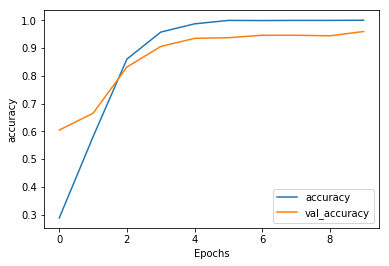

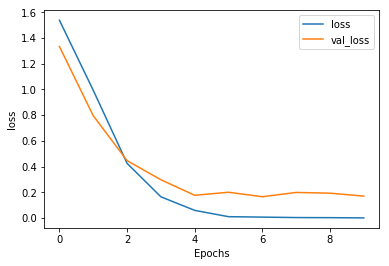

In [7]:
# With Stopwords
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_pad, train_labels, epochs=10, validation_data=(test_pad, test_labels))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Epoch 1/10
56/56 [==============================] - 13s 226ms/step - loss: 1.5130 - accuracy: 0.3382 - val_loss: 1.2962 - val_accuracy: 0.5034
Epoch 2/10
56/56 [==============================] - 14s 244ms/step - loss: 0.7852 - accuracy: 0.6989 - val_loss: 0.5494 - val_accuracy: 0.8067
Epoch 3/10
56/56 [==============================] - 15s 262ms/step - loss: 0.1913 - accuracy: 0.9506 - val_loss: 0.2106 - val_accuracy: 0.9303
Epoch 4/10
56/56 [==============================] - 15s 270ms/step - loss: 0.0359 - accuracy: 0.9938 - val_loss: 0.2535 - val_accuracy: 0.9236
Epoch 5/10
56/56 [==============================] - 15s 271ms/step - loss: 0.0138 - accuracy: 0.9972 - val_loss: 0.1953 - val_accuracy: 0.9393
Epoch 6/10
56/56 [==============================] - 15s 269ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.2441 - val_accuracy: 0.9213
Epoch 7/10
56/56 [==============================] - 15s 267ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.2033 - val_accuracy: 0.9393

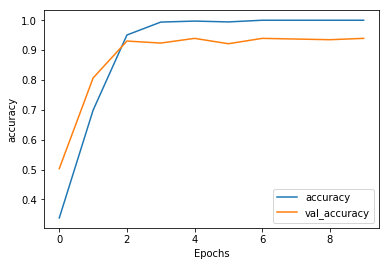

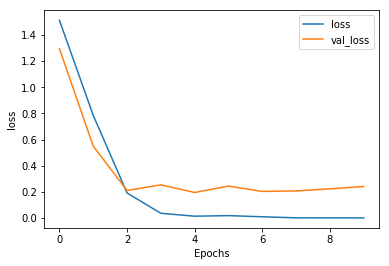

In [125]:
# Without Stopwords
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_pad, train_labels, epochs=10, validation_data=(test_pad, test_labels))

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Epoch 1/10
56/56 [==============================] - 27s 486ms/step - loss: 1.4508 - accuracy: 0.3410 - val_loss: 1.1703 - val_accuracy: 0.4382
Epoch 2/10
56/56 [==============================] - 37s 667ms/step - loss: 0.8486 - accuracy: 0.6635 - val_loss: 0.4583 - val_accuracy: 0.8584
Epoch 3/10
56/56 [==============================] - 38s 682ms/step - loss: 0.3108 - accuracy: 0.9152 - val_loss: 0.4465 - val_accuracy: 0.8921
Epoch 4/10
56/56 [==============================] - 34s 606ms/step - loss: 0.1383 - accuracy: 0.9713 - val_loss: 0.2909 - val_accuracy: 0.9326
Epoch 5/10
56/56 [==============================] - 36s 646ms/step - loss: 0.0481 - accuracy: 0.9933 - val_loss: 0.2840 - val_accuracy: 0.9348
Epoch 6/10
56/56 [==============================] - 37s 665ms/step - loss: 0.0269 - accuracy: 0.9944 - val_loss: 0.3132 - val_accuracy: 0.9371
Epoch 7/10
56/56 [==============================] - 38s 684ms/step - loss: 0.0225 - accuracy: 0.9961 - val_loss: 0.3469 - val_accuracy: 0.9303

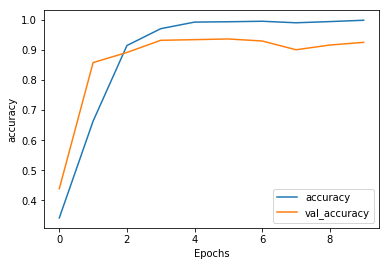

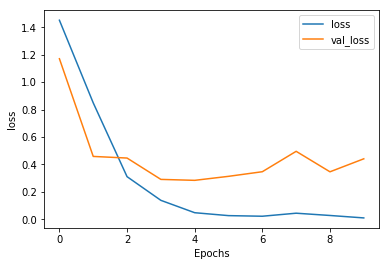

In [100]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(train_pad, train_labels, epochs=10, validation_data=(test_pad, test_labels))

plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

In [6]:
bbc_sport_dir = 'bbcsport/'
sport_categories = {
    'athletics': 0,
    'cricket': 1,
    'football': 2,
    'rugby': 3,
    'tennis': 4
}

sport_text_and_label = []

for label, idx in sport_categories.items():    
    for file_name in glob.glob(bbc_sport_dir + label + '/*.txt'):
        with open(file_name, 'r', encoding='utf8', errors='ignore') as news_file:
            text = news_file.read()
            
#             text_tokenized = word_tokenize(text)
#             text_wo_stopword = [word for word in text_tokenized if not word in STOPWORDS]
            
#             text = ' '.join(text_wo_stopword)
            
        sport_text_and_label.append([text, idx])
        
random.shuffle(sport_text_and_label)

In [7]:
sport_text = [text[0] for text in sport_text_and_label]
sport_label = [label[1] for label in sport_text_and_label]

In [15]:
sport_train_size = int(len(sport_text_and_label) * 0.8)

sport_train_data = sport_text[0: sport_train_size]
sport_train_labels = sport_label[0: sport_train_size]

sport_test_data = sport_text[sport_train_size:]
sport_test_labels = sport_label[sport_train_size:]

In [69]:
tokenizer = Tokenizer(3000, oov_token='<oov>')

In [70]:
tokenizer.fit_on_texts(sport_text)

In [71]:
sport_train_seq = tokenizer.texts_to_sequences(sport_train_data)
sport_test_seq = tokenizer.texts_to_sequences(sport_test_data)

In [72]:
sport_train_pad = pad_sequences(sport_train_seq, maxlen=300, padding='post', truncating='post')
sport_test_pad = pad_sequences(sport_test_seq, maxlen=300, padding='post', truncating='post')

In [73]:
sport_train_labels = np.array(sport_train_labels)
sport_train_labels = sport_train_labels.reshape(589, 1)
sport_test_labels = np.array(sport_test_labels)
sport_test_labels = sport_test_labels.reshape(148,1)

Epoch 1/10
19/19 [==============================] - 3s 177ms/step - loss: 1.5760 - accuracy: 0.3463 - val_loss: 1.4851 - val_accuracy: 0.4122
Epoch 2/10
19/19 [==============================] - 2s 120ms/step - loss: 1.4598 - accuracy: 0.3803 - val_loss: 1.3288 - val_accuracy: 0.4730
Epoch 3/10
19/19 [==============================] - 2s 118ms/step - loss: 1.0913 - accuracy: 0.5178 - val_loss: 1.0029 - val_accuracy: 0.6554
Epoch 4/10
19/19 [==============================] - 2s 119ms/step - loss: 0.7062 - accuracy: 0.7029 - val_loss: 0.7846 - val_accuracy: 0.6486
Epoch 5/10
19/19 [==============================] - 2s 119ms/step - loss: 0.5514 - accuracy: 0.7284 - val_loss: 0.6198 - val_accuracy: 0.7432
Epoch 6/10
19/19 [==============================] - 2s 117ms/step - loss: 0.3876 - accuracy: 0.8489 - val_loss: 0.5012 - val_accuracy: 0.8176
Epoch 7/10
19/19 [==============================] - 2s 112ms/step - loss: 0.2286 - accuracy: 0.9525 - val_loss: 0.4275 - val_accuracy: 0.8446
Epoch 

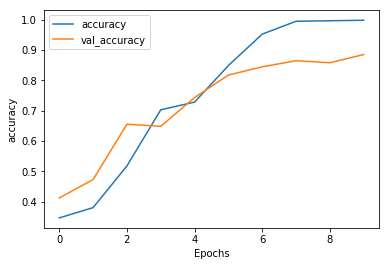

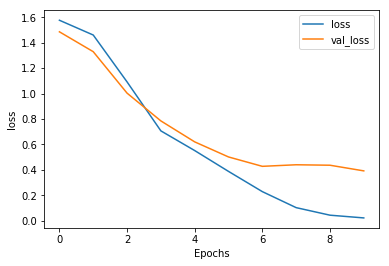

In [41]:
sport_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

sport_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

sport_history = sport_model.fit(sport_train_pad, sport_train_labels, epochs=10, validation_data=(sport_test_pad, sport_test_labels))

plot_graphs(sport_history, "accuracy")
plot_graphs(sport_history, "loss")

Epoch 1/10
19/19 [==============================] - 11s 565ms/step - loss: 1.5641 - accuracy: 0.3226 - val_loss: 1.4728 - val_accuracy: 0.4122
Epoch 2/10
19/19 [==============================] - 10s 534ms/step - loss: 1.3911 - accuracy: 0.4177 - val_loss: 1.1176 - val_accuracy: 0.5203
Epoch 3/10
19/19 [==============================] - 11s 560ms/step - loss: 0.9867 - accuracy: 0.6010 - val_loss: 0.9189 - val_accuracy: 0.5946
Epoch 4/10
19/19 [==============================] - 11s 582ms/step - loss: 0.6671 - accuracy: 0.7199 - val_loss: 0.6858 - val_accuracy: 0.6892
Epoch 5/10
19/19 [==============================] - 11s 580ms/step - loss: 0.3853 - accuracy: 0.8370 - val_loss: 0.5314 - val_accuracy: 0.8311
Epoch 6/10
19/19 [==============================] - 11s 558ms/step - loss: 0.3027 - accuracy: 0.8829 - val_loss: 0.4475 - val_accuracy: 0.8446
Epoch 7/10
19/19 [==============================] - 10s 550ms/step - loss: 0.1541 - accuracy: 0.9508 - val_loss: 0.4822 - val_accuracy: 0.8649

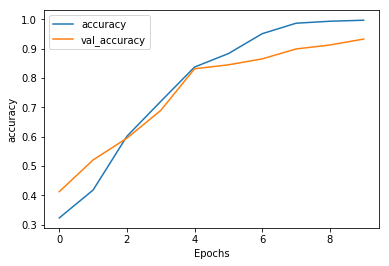

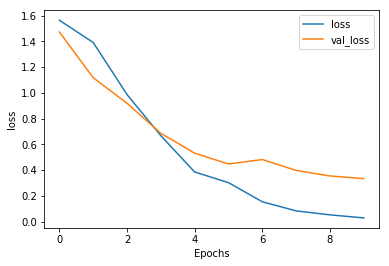

In [42]:
sport_model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

sport_model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

sport_history2 = sport_model.fit(sport_train_pad, sport_train_labels, epochs=10, validation_data=(sport_test_pad, sport_test_labels))

plot_graphs(sport_history2, "accuracy")
plot_graphs(sport_history2, "loss")


Epoch 1/10
19/19 [==============================] - 15s 765ms/step - loss: 1.5642 - accuracy: 0.3243 - val_loss: 1.4716 - val_accuracy: 0.4122
Epoch 2/10
19/19 [==============================] - 13s 699ms/step - loss: 1.4008 - accuracy: 0.4143 - val_loss: 1.0883 - val_accuracy: 0.5473
Epoch 3/10
19/19 [==============================] - 16s 855ms/step - loss: 0.9376 - accuracy: 0.5874 - val_loss: 0.8390 - val_accuracy: 0.6486
Epoch 4/10
19/19 [==============================] - 19s 986ms/step - loss: 0.5341 - accuracy: 0.8065 - val_loss: 1.0708 - val_accuracy: 0.7838
Epoch 5/10
19/19 [==============================] - 18s 964ms/step - loss: 0.2798 - accuracy: 0.9236 - val_loss: 0.7056 - val_accuracy: 0.8176
Epoch 6/10
19/19 [==============================] - 18s 930ms/step - loss: 0.1637 - accuracy: 0.9626 - val_loss: 0.6816 - val_accuracy: 0.8243
Epoch 7/10
19/19 [==============================] - 17s 875ms/step - loss: 0.0769 - accuracy: 0.9847 - val_loss: 0.6382 - val_accuracy: 0.8243

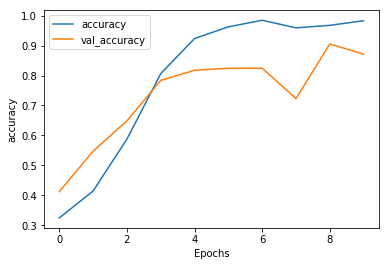

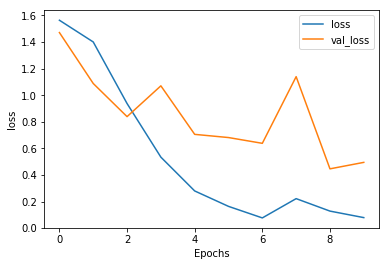

In [74]:
sport_model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.5, recurrent_dropout=0.3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

sport_model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

sport_history3 = sport_model3.fit(sport_train_pad, sport_train_labels, epochs=10, validation_data=(sport_test_pad, sport_test_labels))

plot_graphs(sport_history3, "accuracy")
plot_graphs(sport_history3, "loss")